In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from tensorflow import keras

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. The class labels are:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

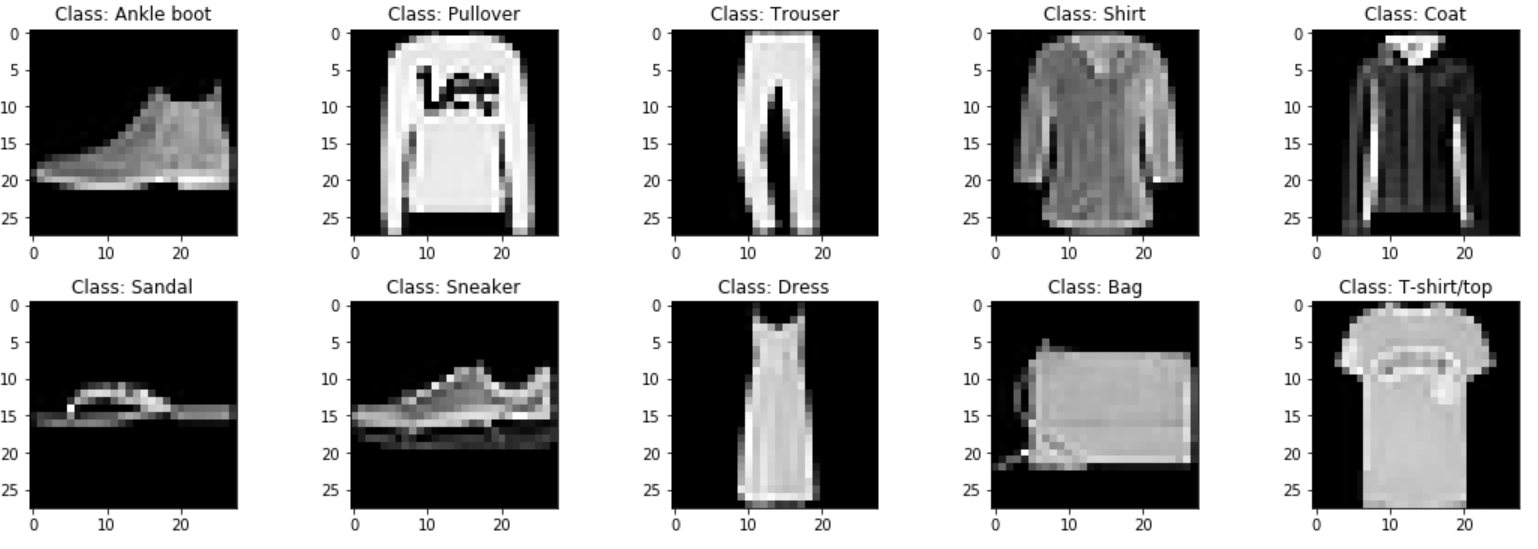

### Usage:
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Returns:
2 tuples:
1. x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
2. y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Data Reshape

In [7]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

### Data normalization
We then normalize the data dimensions so that they are of approximately the same scale.

In [8]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

### Split the data into train/validation/test datasets
In the earlier step of importing the date, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dateset is used in deep learning:

* __Training data__ — used for training the model
* __Validation data__ — used for tuning the hyperparameters and evaluate the models
* __Test data__ — used to test the model after the model has gone through initial vetting by the validation set.

In [9]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

### Create the model architecture

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

### Architecture

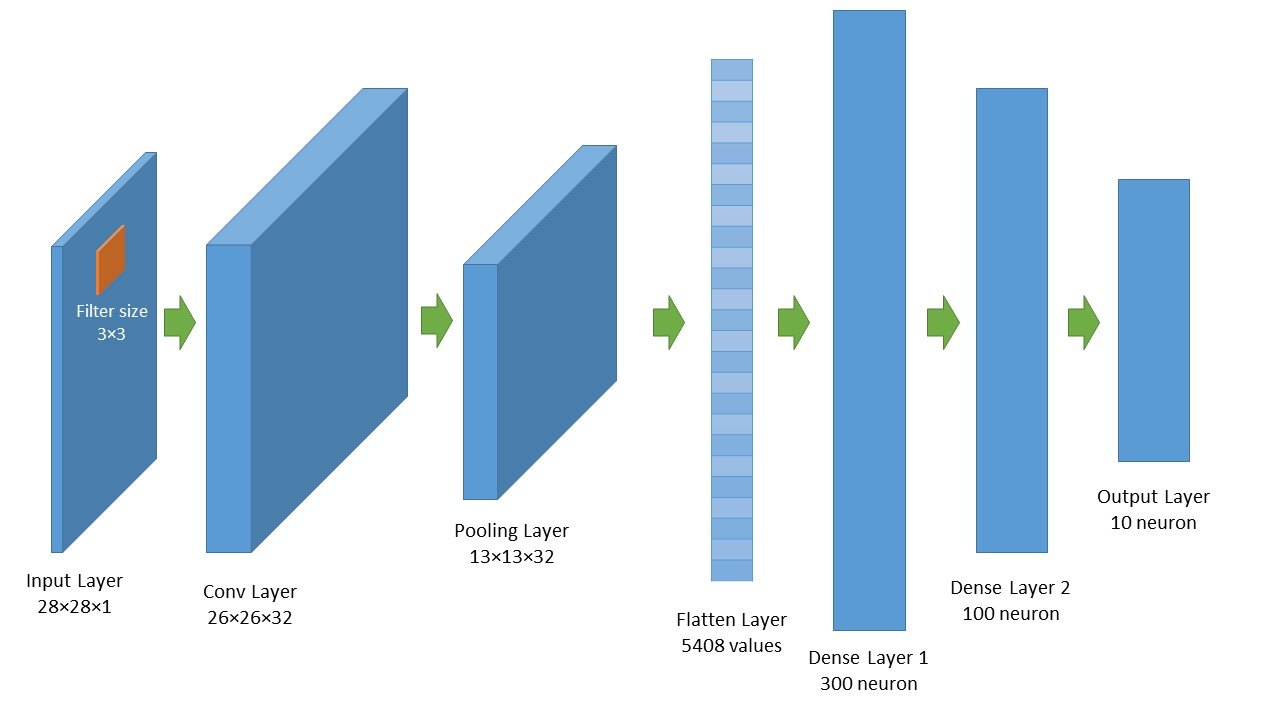

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [12]:
model_history = model.fit(X_train, y_train, epochs=30,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 31s 570us/sample - loss: 0.8755 - accuracy: 0.7029 - val_loss: 0.5964 - val_accuracy: 0.7848
Epoch 2/30
55000/55000 [==============================] - 30s 551us/sample - loss: 0.5388 - accuracy: 0.8046 - val_loss: 0.5042 - val_accuracy: 0.8196
Epoch 3/30
55000/55000 [==============================] - 30s 553us/sample - loss: 0.4782 - accuracy: 0.8278 - val_loss: 0.4865 - val_accuracy: 0.8252
Epoch 4/30
55000/55000 [==============================] - 31s 555us/sample - loss: 0.4421 - accuracy: 0.8422 - val_loss: 0.4206 - val_accuracy: 0.8538
Epoch 5/30
55000/55000 [==============================] - 32s 579us/sample - loss: 0.4161 - accuracy: 0.8519 - val_loss: 0.4770 - val_accuracy: 0.8192
Epoch 6/30
55000/55000 [==============================] - 31s 559us/sample - loss: 0.3962 - accuracy: 0.8587 - val_loss: 0.4258 - val_accuracy: 0.8514
Epoch 7/30
55000/55000 [=====================

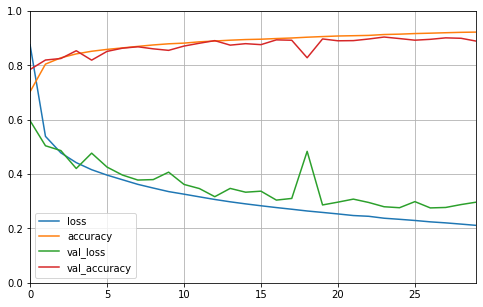

In [13]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [14]:
ev = model.evaluate(X_test_n, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [15]:
ev

[0.31508264254331586, 0.8834]

In [16]:
X_new = X_test[:3]

In [17]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [18]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


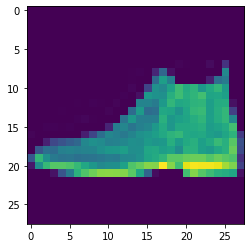

In [19]:
print(plt.imshow(X_test[0].reshape((28,28))))

In [11]:
keras.backend.clear_session

<function tensorflow.python.keras.backend.clear_session()>

In [12]:
del model

NameError: name 'model' is not defined

### Architecture - Pooling vs No Pooling

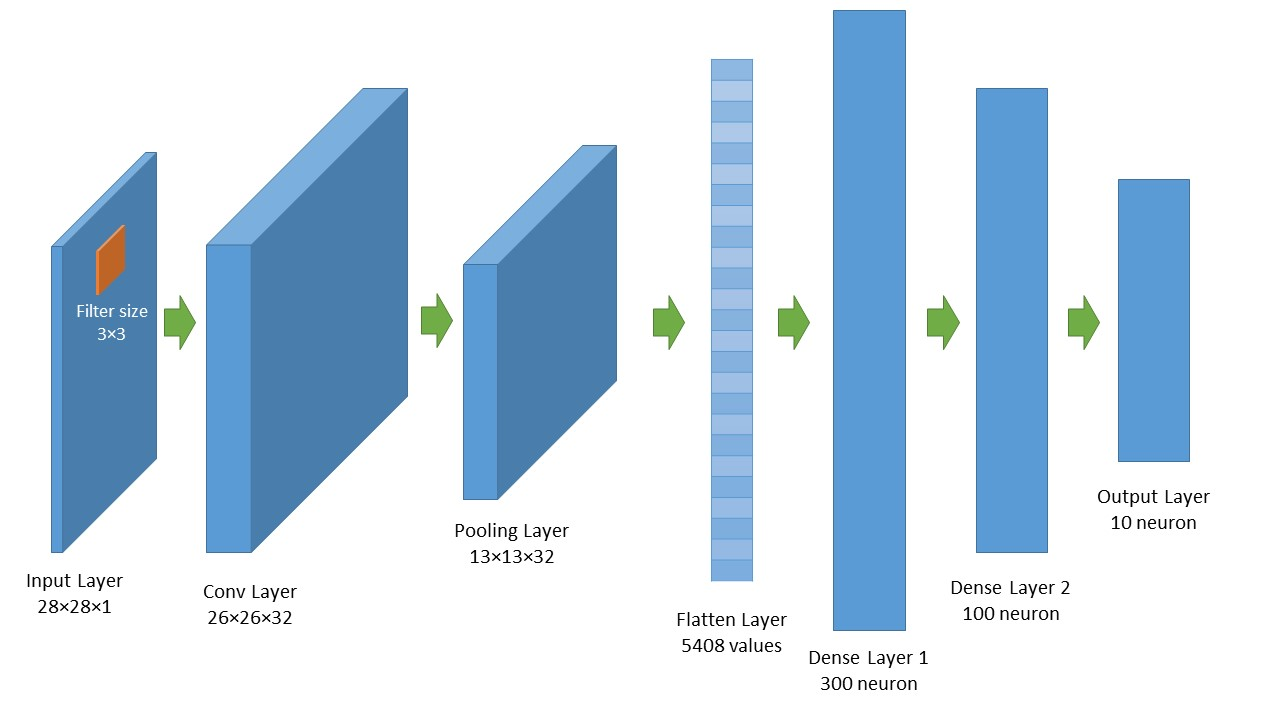

### Pooling vs No Pooling

In [14]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation="relu"))
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation="relu"))
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))


In [15]:
model_a.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [16]:
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               6489900   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 6,521,330
Trainable params: 6,521,330
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_a.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [18]:
model_history_a = model_a.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))


Train on 55000 samples, validate on 5000 samples
Epoch 1/3
55000/55000 [==============================] - 31s 565us/sample - loss: 0.8755 - accuracy: 0.7029 - val_loss: 0.5964 - val_accuracy: 0.7848
Epoch 2/3
55000/55000 [==============================] - 31s 556us/sample - loss: 0.5388 - accuracy: 0.8046 - val_loss: 0.5042 - val_accuracy: 0.8196
Epoch 3/3
55000/55000 [==============================] - 30s 554us/sample - loss: 0.4782 - accuracy: 0.8278 - val_loss: 0.4865 - val_accuracy: 0.8252


In [19]:
model_history_b = model_b.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/3
55000/55000 [==============================] - 62s 1ms/sample - loss: 0.7138 - accuracy: 0.7523 - val_loss: 0.5047 - val_accuracy: 0.8188
Epoch 2/3
55000/55000 [==============================] - 63s 1ms/sample - loss: 0.4899 - accuracy: 0.8232 - val_loss: 0.4656 - val_accuracy: 0.8342
Epoch 3/3
55000/55000 [==============================] - 62s 1ms/sample - loss: 0.4367 - accuracy: 0.8425 - val_loss: 0.4794 - val_accuracy: 0.8248
